<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-Task7/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

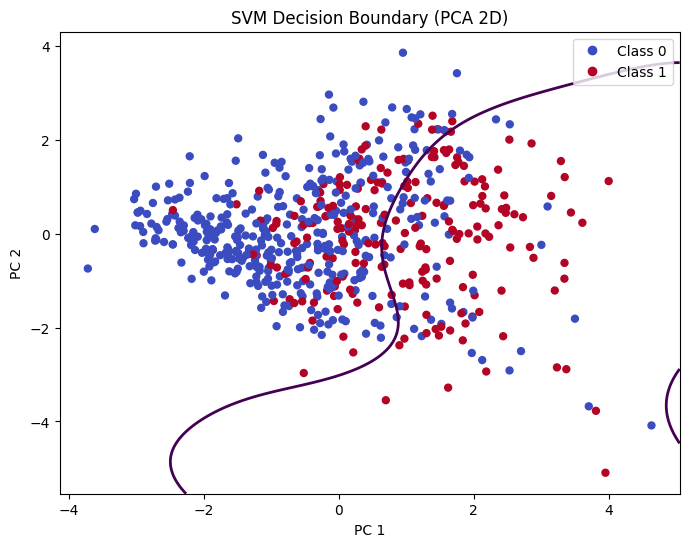

In [ ]:
# SVM Decision Boundary using PCA 2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd

# One comment: Load, preprocess, train SVM with PCA and plot decision boundary
url="https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df=pd.read_csv(url)
cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for c in cols: df[c]=df[c].replace(0,np.nan)
df["Glucose"]=df["Glucose"].fillna(df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].fillna(df["BloodPressure"].median())
df["SkinThickness"]=df["SkinThickness"].fillna(df["SkinThickness"].median())
df["Insulin"]=df["Insulin"].fillna(df["Insulin"].median())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

X=df.drop("Outcome",axis=1)
y=df["Outcome"]

sc=StandardScaler()
X=sc.fit_transform(X)

p=PCA(n_components=2)
X_p=p.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_p,y,test_size=0.2,random_state=42)

model=SVC(kernel="rbf",C=1,gamma="scale")
model.fit(X_train,y_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="coolwarm",s=25)
ax=plt.gca()
xlim=ax.get_xlim(); ylim=ax.get_ylim()
xx,yy=np.meshgrid(np.linspace(xlim[0],xlim[1],200),np.linspace(ylim[0],ylim[1],200))
Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ax.contour(xx,yy,Z,levels=[0],linewidths=2)
plt.title("SVM Decision Boundary (PCA 2D)")
plt.xlabel("PC 1"); plt.ylabel("PC 2")
plt.legend(handles=scatter.legend_elements()[0],labels=["Class 0","Class 1"])
plt.show()
